### Instituto Tecnológico de Costa Rica

#### Profesor: Sergio Arriola Valverde.

#### Taller de Comunicaciones Electricas.

Integrantes:
- Jorge Andrés Brenes Alfaro.
- Pablo César Calderón Piedra.
- Kimberly María Carvajal Méndez.
- Jason Steven Valverde Picado.

# Análisis Estadístico del set de datos

Este bloque tiene como objetivo el modelar la adquisición de datos entre el monitor y el transmisor (TX). Dichos datos se encuentran en un excel a los cuales les fue añadido ruido. Este apartado se enfoca en realizar un **análisis estadístico** del conjunto de datos recopilados, para ello se llevo a cabo:
- Cálculo de promedio y desviación estándar
- Test de Anderson Darling
- Histograma
- Test de Grubbs
- Diagrama de caja

### Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import anderson
import time

## Inicio de reloj

In [2]:
start= time.time()

## 1.1 Extracción de datos

In [3]:
Datos = pd.read_excel('Dataset.xlsx')  #Se leen los datos del archivo .xlsx

Estadistica = Datos.describe()

#**** Se convierten los valores a un array****
Datos = Datos.values
Estadistica = Estadistica.values

#**** Se separan los valores del Tiempo y los BPM****
Tiempo = Datos[:,0]  
BPM = Datos[:,1]

## 1.2 Cálculo de promedio, desviación estándar, mínimos, máximos y cantidad de muestras

In [4]:
#Se calculan los promedios, desviaciones estándar del tiempo y los BPM.
Promedio_t = Estadistica [1,0]
Promedio_bpm = Estadistica [1,1]
desv_t = Estadistica [3,0]
desv_bpm = Estadistica [2,1]

#Mínimos y máximos del tiempo y los BPM.
BPM_min = Estadistica [3,1]
BPM_max = Estadistica [7,1]
Tiempo_min =  Estadistica [3,0]
Tiempo_max = Estadistica [7,0]

BPM_count = Estadistica [0,0] #Cantidad de muestras.

<h3><center> BPM vs Tiempo (Gráfica de datos con ruido) </center></h3>

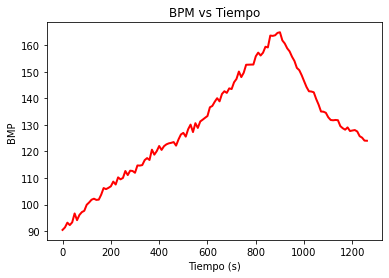

In [5]:
plt.plot(Tiempo, BPM, color='red', linewidth=2)
plt.title('BPM vs Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('BMP')
plt.show()

## 1.3 Test de Anderson Darling

El test de Anderson Darling mide que tán bien siguen los datos una distribución específica. Para determinar este estadístico se plantea la hipótesis a continuación:
<h3><center> Hipótesis </center></h3>

<center>- H0 = Los datos siguen una distribución normal.</center>
<center>- H1 = Los datos no siguen una distribución normal.</center>

In [6]:
dist='norm' #Se define distribución normal.
[p, valor_critico, significancia]=anderson(BPM, dist)  #Función para el test de Anderson Darling.
alpha=(significancia[2]/100)

print("Valor p: ", p, "\nSignificancia: ", alpha)

Valor p:  0.5779982094566378 
Significancia:  0.05


## 1.4 Histograma

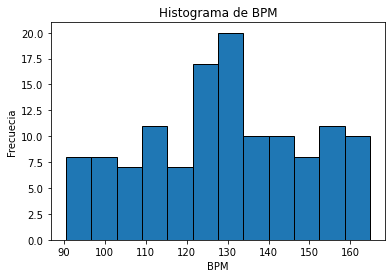

In [7]:
clases = math.ceil(np.sqrt(BPM_count))  #Determinación de clases del histograma.

plt.hist(BPM, bins=clases, edgecolor='black', linewidth=1)
plt.title('Histograma de BPM')
plt.xlabel('BPM')
plt.ylabel('Frecuecia')
plt.show()

## 1.5 Test de Grubbs

El test de Grubbs es una prueba para identificar valores atípicos en un conjunto de datos.

Código base y fórmulas extraídos de:
B. Bahatt, "outlier detection grubbs test and generalized esd test python", 2019. [Online]
Disponible en: https://github.com/bhattbhavesh91/outlier-detection-grubbs-test-and-generalized-esd-test-python/blob/master/grubbs-test-for-outliers.ipynb

#### Función para calcular el valor crítico de Grubbs
El valor crítico de Grubbs se calcula como:
$G_{critico} = \frac{N-1}{\sqrt{N}}\sqrt{\frac{(t_{\alpha/2N,N-2})^2}{N-2 + (t_{\alpha/2N,N-2})^2}}$

In [8]:
def G_Critico(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerador = (size - 1) * np.sqrt(np.square(t_dist))
    denominador = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    valor_critico = numerador / denominador
    return valor_critico

El valor de Grubbs se calcula como:
$G_{calculado}=\frac{max|Y_i - \bar{Y}|}{s}$

In [9]:
G = abs((BPM-Promedio_bpm)/desv_bpm)
G_critico = G_Critico(BPM_count, alpha)

### Datos Atípicos

Una vez determinado los valores del test de Grubbs necesarios se procede a corroborar si extisten valores atípicos

In [10]:
cont = 0
for i in range(int(BPM_count)):
    if G[i] > G_critico:
        print ('Dato atípico: ', BPM[i])
        cont += 1
print('Cantidad de Datos Atípicos: ', cont)

Cantidad de Datos Atípicos:  0


## 1.6 Diagrama de caja (Boxplot)

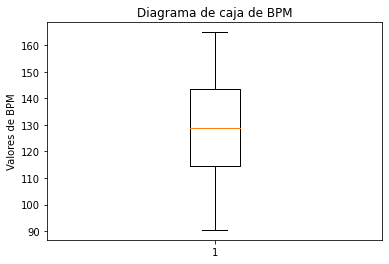

In [11]:
plt.boxplot(BPM)
plt.title('Diagrama de caja de BPM')
plt.ylabel('Valores de BPM')
plt.show()

## Fin del reloj. Tiempo de ejecución

In [12]:
end= time.time()
tiempo = end-start
print('\n Tiempo de ejecucion', tiempo)


 Tiempo de ejecucion 1.7636938095092773
